# Benchmark EDF R&D 

In [1]:
import openturns as ot
import numpy as np
import otbenchmark as otb

In [2]:
import openturns.viewer as otv
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

We present the BBRC test cases using the otbenchmark module

In [3]:
print("--------------------")
p8 = otb.ReliabilityProblem8()
print("--------------------")
p14 = otb.ReliabilityProblem14()
print("--------------------")
p22 = otb.ReliabilityProblem22()
print("--------------------")
p24 = otb.ReliabilityProblem24()
print("--------------------")
p25 = otb.ReliabilityProblem25()
print("--------------------")
p28 = otb.ReliabilityProblem28()
print("--------------------")
p31 = otb.ReliabilityProblem31()
print("--------------------")
p33 = otb.ReliabilityProblem33()
print("--------------------")
p35 = otb.ReliabilityProblem35()
print("--------------------")
p38 = otb.ReliabilityProblem38()
print("--------------------")
p53 = otb.ReliabilityProblem53()
print("--------------------")
p55 = otb.ReliabilityProblem55()
print("--------------------")
p57 = otb.ReliabilityProblem57()
print("--------------------")
p75 = otb.ReliabilityProblem75()
print("--------------------")
p89 = otb.ReliabilityProblem89()
print("--------------------")
p107 = otb.ReliabilityProblem107()
print("--------------------")
p110 = otb.ReliabilityProblem110()
print("--------------------")
p111 = otb.ReliabilityProblem111()
print("--------------------")
p63 = otb.ReliabilityProblem63()
print("--------------------")
p91 = otb.ReliabilityProblem91()
print("--------------------")
p60 = otb.ReliabilityProblem60()
print("--------------------")
p77 = otb.ReliabilityProblem77()

--------------------
x1 + 2 * x2 + 2 * x3 + x4 - 5 * x5 - 5 * x6
--------------------
x1 - 32 / (pi * x2^3) * sqrt(x3^2 * x4^2 / 10 + x5^2)
--------------------
2.5 - 1 / sqrt(2) * (x1 + x2) + 0.1 * (x1 - x2) ^2
--------------------
2.5 - 0.2357 * (x1 - x2) + 0.00463 * (x1 + x2 - 20)^4
--------------------
var g1 := x1^2 -8 * x2 + 16;var g2 := -16 * x1 + x2 + 32;gsys := max(g1, g2)
--------------------
 x1 * x2 - 146.14 
--------------------
2 - x2 + 256 * x1^4
--------------------
min(-x1 - x2 - x3 + 3 * sqrt(3), -x3 + 3)
--------------------
var g1 := 2 - x2 + exp(-0.1 * x1^2) + (0.2 * x1) ^ 4;var g2 := 4.5 - x1 * x2;gsys := min(g1, g2)
--------------------
15.59 * 1e4 - x1 *x2^3 / (2 * x3^3) *((x4^2 - 4 * x5 * x6 * x7^2 + x4 * (x6 + 4 * x5 + 2 *x6 * x7)) / (x4 * x5 * (x4 + x6 + 2 *x6 *x7)))
--------------------
sin(5 * x1 / 2) + 2 - ( x1 * x1 + 4 ) * ( x2 - 1 ) / 20
--------------------
var g1 := 0.2 + 0.6 * (x1 - x2)^4 - (x1 - x2) / sqrt(2);var g2 := 0.2 + 0.6 * (x1 - x2)^4 + (x1 -

We list these problems

In [4]:
Liste_problem = [
    p8,
    p14,
    p22,
    p24,
    p25,
    p28,
    p31,
    p33,
    p35,
    p38,
    p53,
    p55,
    p57,
    p75,
    p89,
    p107,
    p110,
    p111,
    p63,
    p91,
    p60,
    p77,
]
L = np.size(Liste_problem)
L

22

We use the following methods to solve the optimization problem "FORM" and "SORM"

In [5]:
# Cobyla algorithm
myCobyla = ot.Cobyla()
# Resolution options:
eps = 1e-3
myCobyla.setMaximumEvaluationNumber(100)
myCobyla.setMaximumAbsoluteError(eps)
myCobyla.setMaximumRelativeError(eps)
myCobyla.setMaximumResidualError(eps)
myCobyla.setMaximumConstraintError(eps)

In [6]:
# AbdoRackwitz algorithm
solver = ot.AbdoRackwitz()

# The FORM method

In [7]:
def FORM(Problem):
    myEvent = Problem.getEvent()
    inputVector = myEvent.getAntecedent()
    myDistribution = inputVector.getDistribution()
    g = Problem.getEvent().getFunction()
    p_exact = Problem.getProbability()
    Name = Problem.getName()
    algoFORM = ot.FORM(myCobyla, myEvent, myDistribution.getMean())
    initialNumberOfCall = g.getEvaluationCallsNumber()
    algoFORM.run()
    resultFORM = algoFORM.getResult()
    numberOfFunctionEvaluationsFORM = g.getEvaluationCallsNumber() - initialNumberOfCall
    return [resultFORM, numberOfFunctionEvaluationsFORM]

# The SORM method

In [8]:
def SORM(Problem):
    myEvent = Problem.getEvent()
    inputVector = myEvent.getAntecedent()
    myDistribution = inputVector.getDistribution()
    g = Problem.getEvent().getFunction()
    p_exact = Problem.getProbability()
    Name = Problem.getName()
    algoSORM = ot.SORM(myCobyla, myEvent, myDistribution.getMean())
    initialNumberOfCall = g.getEvaluationCallsNumber()
    algoSORM.run()
    resultSORM = algoSORM.getResult()
    numberOfFunctionEvaluationsSORM = g.getEvaluationCallsNumber() - initialNumberOfCall
    return [resultSORM, numberOfFunctionEvaluationsSORM]

In [9]:
def LHS(Problem):
    myEvent = Problem.getEvent()
    inputVector = myEvent.getAntecedent()
    myDistribution = inputVector.getDistribution()
    g = Problem.getEvent().getFunction()
    p_exact = Problem.getProbability()
    Name = Problem.getName()
    algo = ot.LHS(myEvent)
    initialNumberOfCall = g.getEvaluationCallsNumber()
    algo.setMaximumCoefficientOfVariation(0.05)
    algo.setMaximumOuterSampling(int(1e5))
    algo.run()
    numberOfFunctionEvaluationsLHS = g.getEvaluationCallsNumber() - initialNumberOfCall
    resultLHS = algo.getResult()
    return [
        resultLHS.getProbabilityEstimate(),
        numberOfFunctionEvaluationsLHS,
        algo.drawProbabilityConvergence(),
    ]

In [10]:
Problem = p8
LHS(Problem)[1]

100000

# The MonteCarloSampling method

In [11]:
def MonteCarloSampling(Problem, NBS, cv):
    myEvent = Problem.getEvent()
    inputVector = myEvent.getAntecedent()
    myDistribution = inputVector.getDistribution()
    g = Problem.getEvent().getFunction()
    experiment = ot.MonteCarloExperiment()
    myMC = ot.ProbabilitySimulationAlgorithm(myEvent, experiment)
    myMC.setMaximumOuterSampling(NBS)
    myMC.setBlockSize(1)
    myMC.setMaximumCoefficientOfVariation(cv)
    initialNumberOfCall = g.getEvaluationCallsNumber()
    myMC.run()
    resultMC = myMC.getResult()
    numberOfFunctionEvaluationsMonteCarlo = (
        g.getEvaluationCallsNumber() - initialNumberOfCall
    )
    return [
        resultMC,
        numberOfFunctionEvaluationsMonteCarlo,
        myMC.drawProbabilityConvergence(),
    ]

# The ImportanceSampling method

In [12]:
def ImportanceSampling(Problem):
    myEvent = Problem.getEvent()
    inputVector = myEvent.getAntecedent()
    myDistribution = inputVector.getDistribution()
    g = Problem.getEvent().getFunction()
    p_exact = Problem.getProbability()
    Name = Problem.getName()
    algoFORM = ot.FORM(myCobyla, myEvent, myDistribution.getMean())
    initialNumberOfCall = g.getEvaluationCallsNumber()
    algoFORM.run()
    resultFORM = algoFORM.getResult()
    standardSpaceDesignPoint = resultFORM.getStandardSpaceDesignPoint()
    d = myDistribution.getDimension()
    myImportance = ot.Normal(
        standardSpaceDesignPoint, [1.0] * d, ot.CorrelationMatrix(d)
    )
    experiment = ot.ImportanceSamplingExperiment(myImportance)
    algo = ot.ProbabilitySimulationAlgorithm(ot.StandardEvent(myEvent), experiment)
    algo.setMaximumCoefficientOfVariation(0.1)
    algo.setMaximumOuterSampling(50000)
    algo.setConvergenceStrategy(ot.Full())
    algo.run()
    resultTirage = algo.getResult()
    graph = algo.drawProbabilityConvergence()
    numberOfFunctionEvaluationsTirage = (
        g.getEvaluationCallsNumber() - initialNumberOfCall
    )
    return [resultTirage, numberOfFunctionEvaluationsTirage, graph]

# The Subset method

In [13]:
def SubsetSampling(Problem):
    myEvent = Problem.getEvent()
    inputVector = myEvent.getAntecedent()
    myDistribution = inputVector.getDistribution()
    g = Problem.getEvent().getFunction()
    mySS = ot.SubsetSampling(myEvent)
    mySS.setMaximumOuterSampling(1000)
    mySS.setBlockSize(1)
    initialNumberOfCall = g.getEvaluationCallsNumber()
    mySS.run()
    graph = mySS.drawProbabilityConvergence()
    resultSS = mySS.getResult()
    numberOfFunctionSS = g.getEvaluationCallsNumber() - initialNumberOfCall
    return [resultSS, numberOfFunctionSS, graph]

The following function computes the number of correct base-10 digits in the computed result compared to the exact result.

In [14]:
def computeLogRelativeError(exact, computed):
    logRelativeError = -np.log10(abs(exact - computed) / abs(exact))
    return logRelativeError

In [15]:
def Error(exact, computed):
    logRelativeError = abs(exact - computed)
    return logRelativeError

the `compareMethode` method takes as a parameter a problem and it returns the probabilities estimated by each method, in addition, it returns the performance of these methods

In [16]:
def CompareMethode(Problem):
    liste = []
    liste1 = []
    print("La probabilité exacte ", Problem.getProbability())
    print("------------------------------------------------------------------")
    print(
        "La probabilité estimée par la méthode SubsetSampling",
        SubsetSampling(Problem)[0].getProbabilityEstimate(),
    )
    print("Le nombre d'appel à la fonction d'état limite :", SubsetSampling(Problem)[1])
    logRelativeError1 = computeLogRelativeError(
        Problem.getProbability(), SubsetSampling(Problem)[0].getProbabilityEstimate()
    )
    liste.append(logRelativeError1)
    print("Number of correct digits=%.3f" % (logRelativeError1))
    performance1 = logRelativeError1 / SubsetSampling(Problem)[1]
    liste1.append(performance1)
    print("Performance=%.2e (correct digits/evaluation)" % (performance1))
    print("------------------------------------------------------------------")
    print(
        "La probabilité estimée par la méthode FORM",
        FORM(Problem)[0].getEventProbability(),
    )
    print("Le nombre d'appel à la fonction d'état limite :", FORM(Problem)[1])
    logRelativeError2 = computeLogRelativeError(
        Problem.getProbability(), FORM(Problem)[0].getEventProbability()
    )
    liste.append(logRelativeError2)
    print("Number of correct digits=%.3f" % (logRelativeError2))
    performance2 = logRelativeError2 / FORM(Problem)[1]
    liste1.append(performance2)
    print("Performance=%.2e (correct digits/evaluation)" % (performance2))
    print("--------------------------------------------------------------------")
    print(
        "La probabilité estimée par la méthode SORM-Breitung",
        SORM(Problem)[0].getEventProbabilityBreitung(),
    )
    print(
        "La probabilité estimée par la méthode SORM-HohenBichler",
        SORM(Problem)[0].getEventProbabilityHohenBichler(),
    )
    print(
        "La probabilité estimée par la méthode SORM-Tvedt",
        SORM(Problem)[0].getEventProbabilityTvedt(),
    )
    print("Le nombre d'appel à la fonction d'état limite :", SORM(Problem)[1])
    logRelativeError3 = computeLogRelativeError(
        Problem.getProbability(), SORM(Problem)[0].getEventProbabilityBreitung()
    )
    liste.append(logRelativeError3)
    print("Number of correct digits=%.3f" % (logRelativeError3))
    performance3 = logRelativeError3 / FORM(Problem)[1]
    liste1.append(performance3)
    print("Performance=%.2e (correct digits/evaluation)" % (performance3))
    print("---------------------------------------------------------------------")
    print(
        "La probabilité estimée par ImportanceSampling",
        ImportanceSampling(Problem)[0].getProbabilityEstimate(),
    )
    print(
        "Le nombre d'appel à la fonction d'état limite :",
        ImportanceSampling(Problem)[1],
    )
    logRelativeError4 = computeLogRelativeError(
        Problem.getProbability(),
        ImportanceSampling(Problem)[0].getProbabilityEstimate(),
    )
    liste.append(logRelativeError4)
    print("Number of correct digits=%.3f" % (logRelativeError4))
    performance4 = logRelativeError4 / ImportanceSampling(Problem)[1]
    liste1.append(performance4)
    print("Performance=%.2e (correct digits/evaluation)" % (performance4))
    print("----------------------------------------------------------------------")
    print(
        "La probabilité estimée par MonteCarloSampling ",
        MonteCarloSampling(Problem, 10000, 0.01)[0].getProbabilityEstimate(),
    )
    print(
        "Le nombre d'appel à la fonction d'état limite :",
        MonteCarloSampling(Problem, 10000, 0.01)[1],
    )
    x = MonteCarloSampling(Problem, 10000, 0.01)[0].getProbabilityEstimate()
    logRelativeError5 = computeLogRelativeError(Problem.getProbability(), x)
    liste.append(logRelativeError5)
    print("Number of correct digits=%.3f" % (logRelativeError5))
    performance5 = logRelativeError5 / MonteCarloSampling(Problem, 10000, 0.01)[1]
    liste1.append(performance5)
    print("Performance=%.2e (correct digits/evaluation)" % (performance5))
    print("----------------------------------------------------------------------")
    print("La probabilité estimée par LHS ", LHS(Problem)[0])
    print("Le nombre d'appel à la fonction d'état limite :", LHS(Problem)[1])
    logRelativeError6 = computeLogRelativeError(
        Problem.getProbability(), LHS(Problem)[0]
    )
    liste.append(logRelativeError6)
    print("Number of correct digits=%.3f" % (logRelativeError6))
    performance6 = logRelativeError5 / LHS(Problem)[1]
    liste1.append(performance6)
    print("Performance=%.2e (correct digits/evaluation)" % (performance6))
    liste.sort()
    liste1.sort()
    print("------------------------------------------------------------------------")
    print("---Classement méthode par (Nombre de chiffres corrects)------")
    print("------------------------------------------------------------------------")
    print(
        "Classement de la méthode SubsetSampling : ", 6 - liste.index(logRelativeError1)
    )
    print("Classement de la méthode FORM : ", 6 - liste.index(logRelativeError2))
    print("Classement de la méthode SORM : ", 6 - liste.index(logRelativeError3))
    print(
        "Classement de la méthode ImportanceSampling: ",
        6 - liste.index(logRelativeError4),
    )
    print(
        "Classement de la méthode MonteCarloSampling : ",
        6 - liste.index(logRelativeError5),
    )
    print("Classement de la méthode LHS : ", 6 - liste.index(logRelativeError6))
    print("------------------------------------------------------------------------")
    print("-------------------Classement méthode par Performance-------------------")
    print("------------------------------------------------------------------------")
    print("Classement de la méthode SubsetSampling : ", 6 - liste1.index(performance1))
    print("Classement de la méthode FORM : ", 6 - liste1.index(performance2))
    print("Classement de la méthode SORM : ", 6 - liste1.index(performance3))
    print(
        "Classement de la méthode ImportanceSampling: ", 6 - liste1.index(performance4)
    )
    print(
        "Classement de la méthode MonteCarloSampling : ", 6 - liste1.index(performance5)
    )
    print("Classement de la méthode LHS : ", 6 - liste1.index(performance5))

In [17]:
CompareMethode(p53)

La probabilité exacte  0.0313
------------------------------------------------------------------
La probabilité estimée par la méthode SubsetSampling 0.029299999999999993
Le nombre d'appel à la fonction d'état limite : 2000
Number of correct digits=0.862
Performance=4.31e-04 (correct digits/evaluation)
------------------------------------------------------------------
La probabilité estimée par la méthode FORM 0.11844733484177966
Le nombre d'appel à la fonction d'état limite : 68
Number of correct digits=-0.445
Performance=-6.54e-03 (correct digits/evaluation)
--------------------------------------------------------------------
La probabilité estimée par la méthode SORM-Breitung 0.030065582284311398
La probabilité estimée par la méthode SORM-HohenBichler 0.02551898004354735
La probabilité estimée par la méthode SORM-Tvedt 0.021072442293553463
Le nombre d'appel à la fonction d'état limite : 68
Number of correct digits=1.404
Performance=2.06e-02 (correct digits/evaluation)
--------------

we can also show the convergence graphs ( for example Problem57)

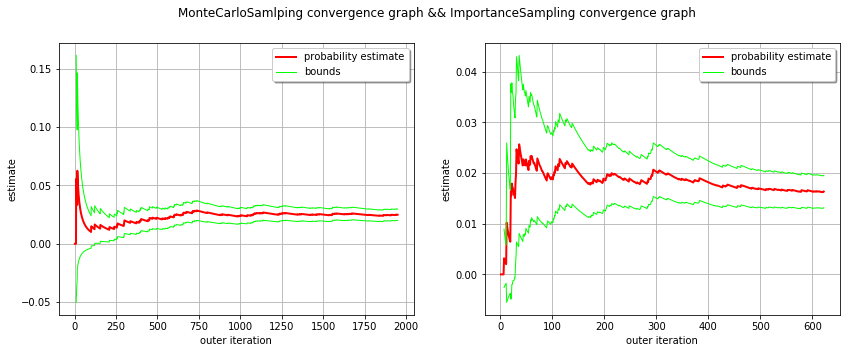

In [18]:
graph1 = MonteCarloSampling(p57, 10000, 0.1)[2]


graph2 = ImportanceSampling(p57)[2]


fig = pl.figure(figsize=(14, 5))
ax_1 = fig.add_subplot(1, 2, 1)
_ = otv.View(graph1, figure=fig, axes=[ax_1])
ax_2 = fig.add_subplot(1, 2, 2)
_ = otv.View(graph2, figure=fig, axes=[ax_2])
_ = fig.suptitle(
    "MonteCarloSamlping convergence graph && ImportanceSampling convergence graph"
)

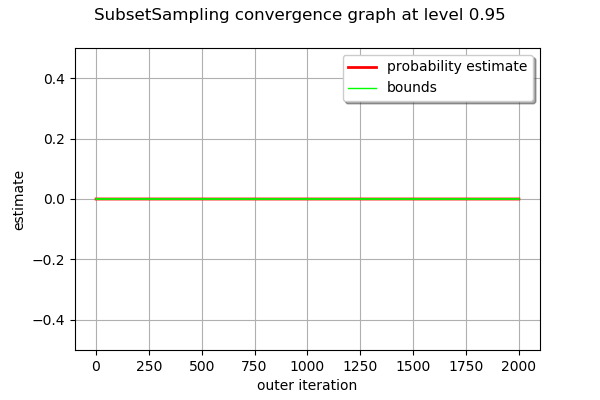

In [19]:
graphe3 = SubsetSampling(p60)[2]
graphe3

# Remarques

* On remarque que les méthodes FORM et SORM sont plus rapides, mais, elles ne converges pas vers la proba exacte.
* On remarque aussi l'efficacité de la méthode ImpotanceSampling ( méthode pas couteuse, et converge).
* La convergence de la méthode de MonteCarlo nécisssite un grand nombre de simulation.
* SubsetSampling converge même si la probabilité est très faible.
* pour RP14 SORM ne marche pas, et aussi ImportanceSampling.
* pour RP91 Subset ne marche pas.


# Hypothèse
* Pour des fonctions objectives de forme polynômial, ImprotanceSampling est la plus efficace.
* Pour des fonctions plus complexes, MonteCarlo reste efficace.